(10, 10, 4, 3)
(100,)
(100,)
(100,)
(10, 10)


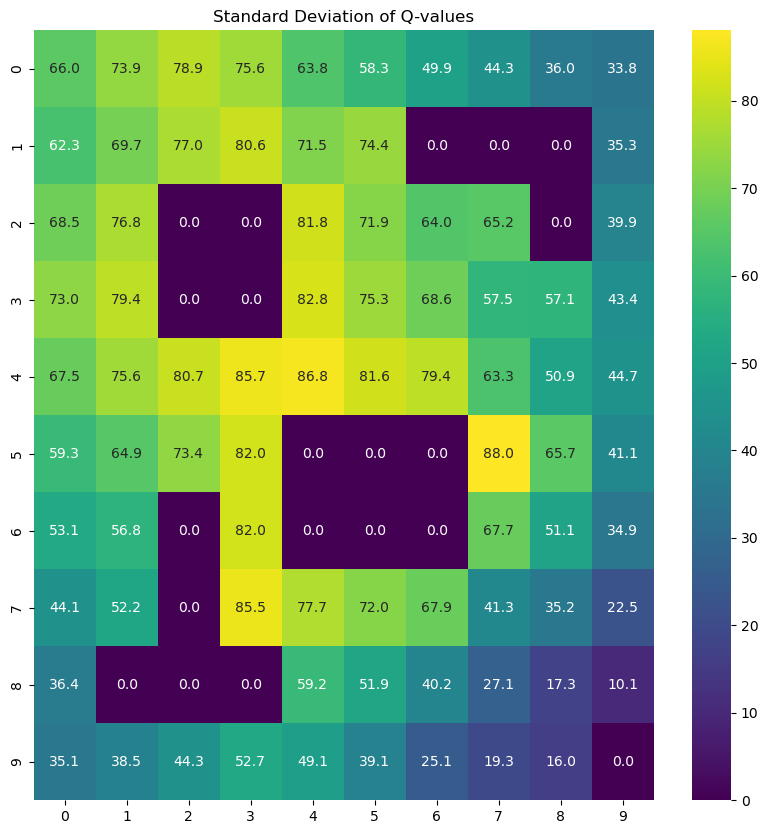

In [15]:
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
os.chdir('/home/sidd/Human-in-the-loop-RL/')

qtable = np.load('Outputs/ALG2/10M.2/qtable.npy')
# qtable = np.load('Outputs/ALG2/10M.2/trapgrid-qtable.npy')

# print(qtable == qtable2)
print(qtable.shape)

best_actions = np.argmax(qtable[:, :, :, 0], axis=2).reshape(-1)
print(best_actions.shape)
rows, cols = np.indices((10, 10))
rows = rows.reshape(-1)
cols = cols.reshape(-1)
print(rows.shape)
print(cols.shape)

# Compute variances
variances = np.sqrt(qtable[rows, cols, best_actions, 2]).reshape(10, 10)
print(variances.shape)
np.save('Outputs/ALG2/10M.2/trapgrid - stddev.npy', variances)

# Plot variance from qtable
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(variances, annot=True, fmt='.1f', cmap='viridis')
ax.set_title('Standard Deviation of Q-values')
plt.show()